# Building a graph with errors and saving it as an image.

Ported to notebook by Theis Hansen

Since we are using ROOT, we need to import it so that we can access its toolkit and set the Notebook to C++.

In [1]:
import ROOT

Welcome to JupyROOT 6.24/08


### The Graph
Here we are setting up our axes, with the number of points (n), our values for the x and y axes, and the values for our errors that are on the y axis.

In [2]:
%%cpp
const int n_points=10;
double x_vals[n_points]= {1,2,3,4,5,6,7,8,9,10};
double y_vals[n_points]= {6,12,14,20,22,24,35,45,44,53};
double y_errs[n_points]= {5,5,4.7,4.5,4.2,5.1,2.9,4.1,4.8,5.43};

We then create the graph using the Type TGraphErrors, this Type allows us to add errors into our graph. We can then make our graph more aesthetic by setting the markers, title, colors to our preferences.

In [3]:
%%cpp
TGraphErrors graph(n_points,x_vals,y_vals,nullptr,y_errs);
graph.SetTitle("Measurement XYZ;length [cm];Arb.Units");
graph.SetMarkerStyle(kOpenCircle);
graph.SetMarkerColor(kBlue);
graph.SetLineColor(kBlue);
graph.SetFillColor(0);

We draw the graph using the Draw command. In case you were wondering, "APE" is simply a specification, telling the computer to draw said object with the Axes, Points (or markers) and Errors.

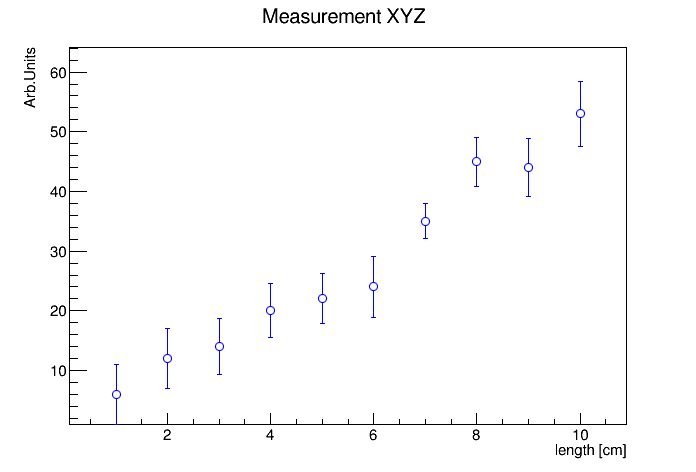

In [4]:
%%cpp
auto c=new TCanvas();
c->cd();
graph.Draw("APE");
c->Draw();

### The Function for the Graph
Here we use the Type TF1 to create a function that we will add to the graph, we also set it to our aesthetic preferences.

In [5]:
%%cpp
TF1 f("Linear Law","[0]+x*[1]",.5,10.5);
f.SetLineColor(kRed); 
f.SetLineStyle(2);

We continue to add our function to our graph and have it fitted to match. This is done with the help of the "&" sign that pulls the function's pointer into the command so we can recuperate its information. The "Same" specification means that we will draw our function on the same graph we were creating earlier.

In [6]:
%%cpp
graph.Fit(&f);
f.Draw("Same");

 FCN=3.84883 FROM MIGRAD    STATUS=CONVERGED      31 CALLS          32 TOTAL
                     EDM=5.96982e-22    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.01604e+00   3.33409e+00   1.48321e-03  -8.98235e-12
   2  p1           5.18756e+00   5.30717e-01   2.36095e-04   9.40487e-12


### Creating an arrow to point out some information
To create an arrow, we use the Type TArrow, in the brackets, the numers correspond respectively to this scheme (x1,y1,x2,y2,size of the arrow ending,shape of the arrows ending - in this case a regular arrow)

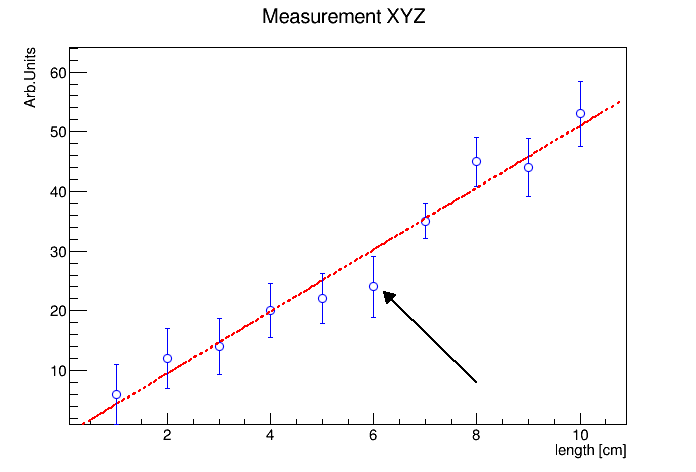

In [7]:
%%cpp
TArrow arrow(8,8,6.2,23,0.02,"|>");
arrow.SetLineWidth(2);
arrow.Draw();
c->Draw();